# Importing the libraries

In [1]:
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVM, LinearSVC

import sklearn.linear_model as sk
logreg=sk.LogisticRegressionCV()

Here we are solving a classification problem, because we are going to predict whether the passenger on Titanic ship Survived or Not Survived.
Thus, the target variable will contain: Survived and Not Survived. Thus, we will use Logistic Regression.

# Load libraries

In [2]:
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

# EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
total=train_df.isnull().sum().sort_values(ascending=False) #It will return number of null values
percent_1=train_df.isnull().sum()/train_df.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Female')

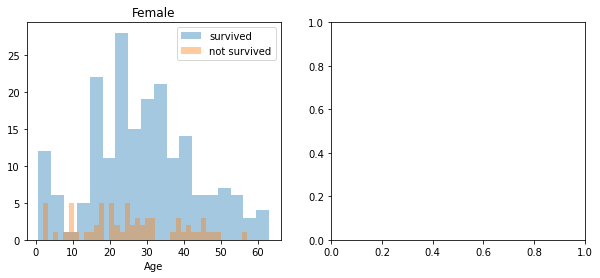

In [9]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=train_df[train_df['Sex']=='female']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


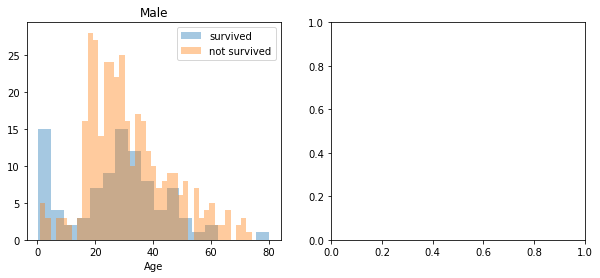

In [46]:
fig, axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
men=train_df[train_df['Sex']=='male']
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
_ =ax.set_title('Male')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


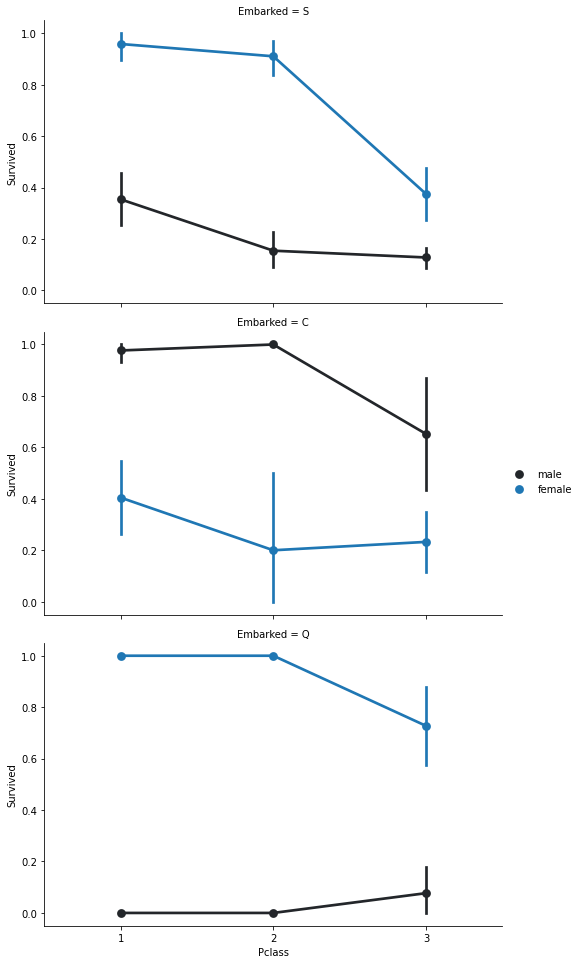

In [10]:
FacetGrid=sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

# Bar plot

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

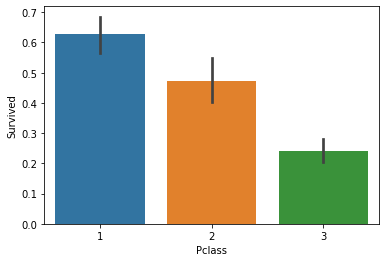

In [11]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

In [12]:
data=[train_df,test_df]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['not_alone']=dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


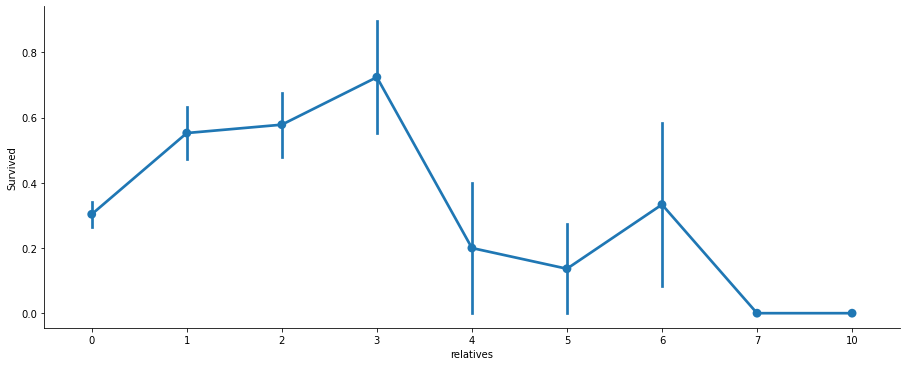

In [6]:
axes=sns.factorplot('relatives','Survived',data=train_df,aspect=2.5)

In [12]:
train_df=train_df.drop(['PassengerId'],axis=1)

In [13]:
import re
deck={"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data=[train_df,test_df]

for dataset in data:
    dataset['Cabin']=dataset['Cabin'].fillna("U0")
    dataset['Deck']=dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck']=dataset['Deck'].map(deck)
    dataset['Deck']=dataset['Deck'].fillna(0)
    dataset['Deck']=dataset['Deck'].astype(int)
# We can drop the cabin feature
train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)

In [12]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8


In [14]:
data=[train_df,test_df]
for dataset in data:
    mean=train_df["Age"].mean()
    std=test_df["Age"].std()
    is_null=dataset["Age"].isnull().sum()
    #Compute random numbers between the mean, std and is_null
    rand_age=np.random.randint(mean-std, mean+std,size=is_null)
    #fill NaN values in Age column with random values generated.
    age_slice=dataset["Age"].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset["Age"]=age_slice
    dataset["Age"]=train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

In [15]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [16]:
common_value='S'
data=[train_df,test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int32  
 13  Deck         891 non-null    int32  
dtypes: float64(1), int32(3), int64(6), object(4)
memory usage: 87.1+ KB


# Converting data types of columns

In [18]:
data=[train_df,test_df]
for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [19]:
data=[train_df,test_df]
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
    #extract titles
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    
    #replace titles with a more common title or as Rare
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                              'Major','Rev','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
    #convert titles into numbers
    dataset['Title']=dataset['Title'].map(titles)
    
    #filling NaN with 0, to get safe
    dataset['Title']=dataset['Title'].fillna(0)
    
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,2,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,4,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,5,0,3,male,35,0,0,373450,8,S,0,1,8,1.0


In [21]:
genders={"male":0,"female":1}
data=[train_df,test_df]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [22]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [23]:
train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

In [24]:
ports={"S":0,"C":1,"Q":2}
data=[train_df,test_df]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(ports)

In [25]:
train_df['Age'].describe()

count    891.000000
mean      29.308642
std       13.461561
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
train_df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,22,1,0,7,0,1,0,8,1.0
1,2,1,1,1,38,1,0,71,1,1,0,3,3.0
2,3,1,3,1,26,0,0,7,0,0,1,8,2.0
3,4,1,1,1,35,1,0,53,0,1,0,3,3.0
4,5,0,3,0,35,0,0,8,0,0,1,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,0,0,1,8,5.0
887,888,1,1,1,19,0,0,30,0,0,1,2,2.0
888,889,0,3,1,29,1,2,23,0,3,0,8,2.0
889,890,1,1,0,26,0,0,30,1,0,1,3,1.0


In [27]:
data=[train_df,test_df]
for dataset in data:
    #dataset['Age']=dataset['Age'].astype(int)
    dataset.loc[dataset['Age']<=11,'Age']=0
    dataset.loc[(dataset['Age']>11)&(dataset['Age']<=18),'Age']=1
    dataset.loc[(dataset['Age']>18)&(dataset['Age']<=22),'Age']=2
    dataset.loc[(dataset['Age']>22)&(dataset['Age']<=27),'Age']=3
    dataset.loc[(dataset['Age']>27)&(dataset['Age']<=33),'Age']=4
    dataset.loc[(dataset['Age']>33)&(dataset['Age']<=40),'Age']=5
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=66),'Age']=6
    dataset.loc[dataset['Age']>66,'Age']=6
    
#Checking how age distributes
train_df['Age'].value_counts()

4    171
6    156
5    140
3    136
2    125
1     95
0     68
Name: Age, dtype: int64

In [28]:
train_df.dropna()
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,1,0,3,0,2,1,0,7,0,1,0,8,1.0
1,2,1,1,1,5,1,0,71,1,1,0,3,3.0
2,3,1,3,1,3,0,0,7,0,0,1,8,2.0
3,4,1,1,1,5,1,0,53,0,1,0,3,3.0
4,5,0,3,0,5,0,0,8,0,0,1,8,1.0
5,6,0,3,0,4,0,0,8,2,0,1,8,1.0
6,7,0,1,0,6,0,0,51,0,0,1,5,1.0
7,8,0,3,0,0,3,1,21,0,4,0,8,4.0
8,9,1,3,1,3,0,2,11,0,2,0,8,3.0
9,10,1,2,1,1,1,0,30,1,1,0,8,3.0


In [29]:
data=[train_df,test_df]
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [30]:
for dataset in data:
    dataset.loc[dataset['Fare']<=7.91,'Fare']=0
    dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']=1
    dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']=2
    dataset.loc[(dataset['Fare']>31)&(dataset['Fare']<=99),'Fare']=3
    dataset.loc[(dataset['Fare']>99)&(dataset['Fare']<=250),'Fare']=4
    dataset.loc[dataset['Fare']>250,'Fare']=5
    dataset['Fare']=dataset['Fare'].astype(int)

In [31]:
data=[train_df,test_df]
for dataset in data:
    dataset['Age_Class']=dataset['Age']* dataset['Pclass']

In [32]:
for dataset in data:
    dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

In [41]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2.0,1,0,0,0,1,0,8,1.0,6.0,0
1,1,1,1,5.0,1,0,3,1,1,0,3,3.0,5.0,1
2,1,3,1,3.0,0,0,0,0,0,1,8,2.0,9.0,0
3,1,1,1,5.0,1,0,3,0,1,0,3,3.0,5.0,1
4,0,3,0,5.0,0,0,1,0,0,1,8,1.0,15.0,1
5,0,3,0,NaN,0,0,1,2,0,1,8,1.0,NaN,1
6,0,1,0,6.0,0,0,3,0,0,1,5,1.0,6.0,3
7,0,3,0,0.0,3,1,2,0,4,0,8,4.0,0.0,0
8,1,3,1,3.0,0,2,1,0,2,0,8,3.0,9.0,0
9,1,2,1,1.0,1,0,2,1,1,0,8,3.0,2.0,1


In [33]:
#Removing rows with Age having NaN
df=train_df
df=df.dropna()
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,3.448934,0.523008,0.381594,1.523008,0.361392,0.904602,0.602694,6.936027,1.722783,7.483726,0.801347
std,257.353842,0.486592,0.836071,0.477990,1.858000,1.102743,0.806057,1.250743,0.635673,1.613459,0.489615,2.074282,1.025806,4.730788,0.953903
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,4.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,1.000000,6.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,5.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,8.000000,2.000000,12.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,6.000000,8.000000,6.000000,5.000000,2.000000,10.000000,1.000000,8.000000,5.000000,18.000000,5.000000


In [34]:
dfObj=train_df.isnull()
dfObj.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
relatives          0
not_alone          0
Deck               0
Title              0
Age_Class          0
Fare_Per_Person    0
dtype: int64

In [35]:
dfObj=train_df.isna()
dfObj.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
relatives          0
not_alone          0
Deck               0
Title              0
Age_Class          0
Fare_Per_Person    0
dtype: int64

In [64]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2.0,1,0,0,0,1,0,8,1.0,6.0,0
1,1,1,1,5.0,1,0,3,1,1,0,3,3.0,5.0,1
2,1,3,1,3.0,0,0,0,0,0,1,8,2.0,9.0,0
3,1,1,1,5.0,1,0,3,0,1,0,3,3.0,5.0,1
4,0,3,0,5.0,0,0,1,0,0,1,8,1.0,15.0,1
6,0,1,0,6.0,0,0,3,0,0,1,5,1.0,6.0,3
7,0,3,0,0.0,3,1,2,0,4,0,8,4.0,0.0,0
8,1,3,1,3.0,0,2,1,0,2,0,8,3.0,9.0,0
9,1,2,1,1.0,1,0,2,1,1,0,8,3.0,2.0,1
10,1,3,1,0.0,1,1,2,0,2,0,7,2.0,0.0,0


In [39]:
ds = df.isin([np.inf, -np.inf])
print(ds)

     PassengerId  Survived  Pclass    Sex    Age  SibSp  Parch   Fare  \
0          False     False   False  False  False  False  False  False   
1          False     False   False  False  False  False  False  False   
2          False     False   False  False  False  False  False  False   
3          False     False   False  False  False  False  False  False   
4          False     False   False  False  False  False  False  False   
..           ...       ...     ...    ...    ...    ...    ...    ...   
886        False     False   False  False  False  False  False  False   
887        False     False   False  False  False  False  False  False   
888        False     False   False  False  False  False  False  False   
889        False     False   False  False  False  False  False  False   
890        False     False   False  False  False  False  False  False   

     Embarked  relatives  not_alone   Deck  Title  Age_Class  Fare_Per_Person  
0       False      False      False  False 

In [40]:
count = np.isinf(df).values.sum()
print("It contains " + str(count) + " infinite values")

It contains 0 infinite values


# Modelling

In [80]:
X_train=df.drop("Survived",axis=1)
print(X_train)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  not_alone  \
0         3    0  2.0      1      0     0         0          1          0   
1         1    1  5.0      1      0     3         1          1          0   
2         3    1  3.0      0      0     0         0          0          1   
3         1    1  5.0      1      0     3         0          1          0   
4         3    0  5.0      0      0     1         0          0          1   
..      ...  ...  ...    ...    ...   ...       ...        ...        ...   
885       3    1  5.0      0      5     2         2          5          0   
886       2    0  3.0      0      0     1         0          0          1   
887       1    1  2.0      0      0     2         0          0          1   
889       1    0  3.0      0      0     2         1          0          1   
890       3    0  4.0      0      0     0         2          0          1   

     Deck  Title  Age_Class  Fare_Per_Person  
0       8    1.0        6.0 

In [81]:
Y_train=df["Survived"]
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [50]:
X_test=test_df.drop("PassengerId",axis=1).copy()
print(X_test)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  relatives  not_alone  \
0         3    0  5.0      0      0     0         2          0          1   
1         3    1  6.0      1      0     0         0          1          0   
2         2    0  6.0      0      0     1         2          0          1   
3         3    0  3.0      0      0     1         0          0          1   
4         3    1  2.0      1      1     1         0          2          0   
..      ...  ...  ...    ...    ...   ...       ...        ...        ...   
413       3    0  NaN      0      0     1         0          0          1   
414       1    1  5.0      0      0     4         1          0          1   
415       3    0  5.0      0      0     0         0          0          1   
416       3    0  NaN      0      0     1         0          0          1   
417       3    0  NaN      1      1     2         1          2          0   

     Deck  Title  Age_Class  Fare_Per_Person  
0       8      1       15.0 

# Logistic Regression

In [82]:
#logreg=LogistcRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train,Y_train)*100,2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').